# EDA Week2 Notebook

In [1]:
## all imports
from IPython.display import HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotly
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

# sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
htmlString = """<!DOCTYPE html>

<html>
    <body>
        <h2>Pink Cab</h2>
        <p>
        Pink Cab is a <strong>ridesharing app</strong> based in Trinidad and Tobago that allows <strong>female drivers</strong> to provide safe transit for <strong>women and children only</strong>. That's right! It's driven by women for women.
        </p>
        
        <h2>Yellow Cab</h2>
        <p>
        Yellow cab date back to at least 1798, when the musical comedy, Cabriolet Jaune (Yellow Cab), debuted at Paris' Theatre de l’Opera Comique National. Yellow cabs were known in Paris and London throughout most of the 1800s. A yellow cab company shook up the New York Cab system in the mid-1880s, offering <strong>cheaper, more predictable fares than competitors</strong>. One of the first automobile cabs in London, in the 1890s, was a yellow electric automobile.<br>There are many yellow cab taxicab operators <strong>around the world</strong> (some with common heritage, some without). The original Yellow Cab Company, based in Chicago, Illinois, was one of the <strong>largest taxicab companies</strong> in the United States.
        </p>
    </body>
</html>"""

HTML(htmlString)

In [3]:
# Data importation
df_cab = pd.read_csv("DataSet/Cab_Data.csv")
df_city = pd.read_csv("DataSet/City.csv")
df_customer = pd.read_csv("DataSet/Customer_ID.csv")
df_ID = pd.read_csv("DataSet/Transaction_ID.csv")

In [4]:
# Clean basic data

def replaceNb(data) :
    """
    Replace data which is error
    """
    lr = []
    for i in range(len(data)) : 
        lr.append(int(data[i].replace(",","")))
    return lr

df_city["Users"] = replaceNb(df_city["Users"])
df_city["Population"] = replaceNb(df_city["Population"])

In [5]:
def scalar(data) : 
    """
    Note the scalar between Price Charged and Cost of Trip
    """
    charge = np.array(data["Price Charged"])
    cost = np.array(data["Cost of Trip"])
    
    lr = []
    
    for i in range(len(data)) : 
        lr.append(charge[i] - cost[i])
        
    return lr

## Cab-data file

In [6]:
# Cab_Data sort
pink_cab = df_cab[df_cab["Company"] == "Pink Cab"]
yellow_cab = df_cab[df_cab["Company"] == "Yellow Cab"]
df_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


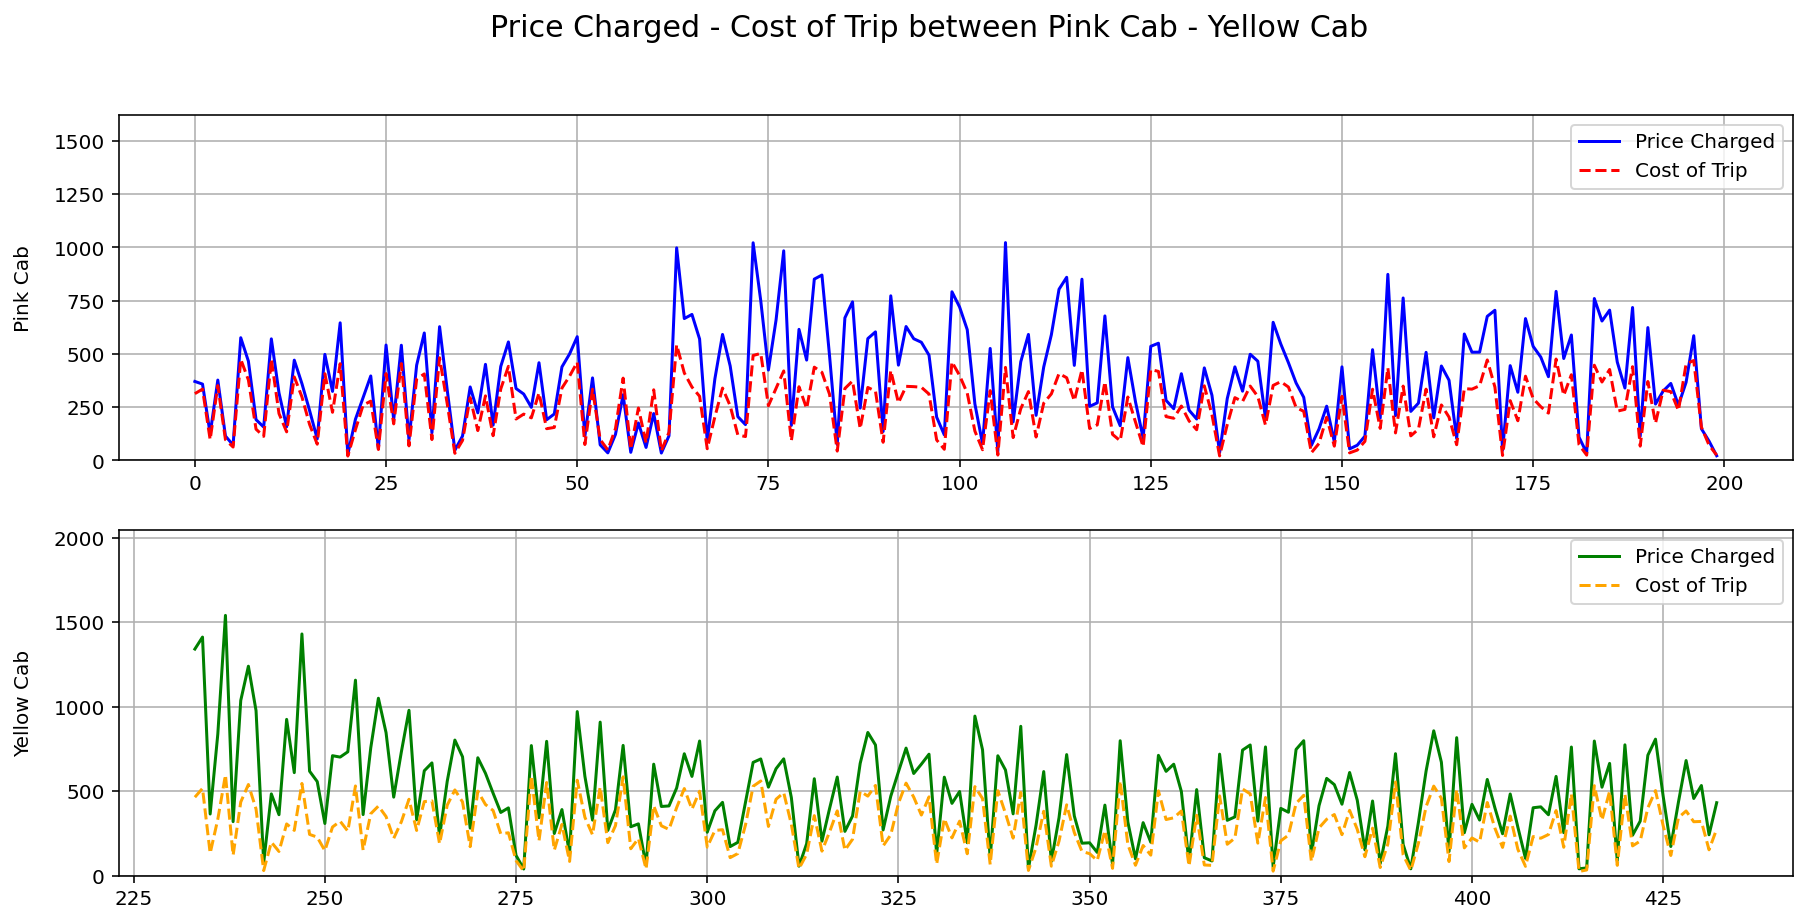

In [7]:
fig, (ax1,ax2) = plt.subplots(2,1)

fig.suptitle("Price Charged - Cost of Trip between Pink Cab - Yellow Cab", fontsize = 15)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph

ax1.plot(pink_cab["Price Charged"][0:200], color = "blue", label = "Price Charged", linestyle = "-")
ax1.plot(pink_cab["Cost of Trip"][0:200], color = "red", label = "Cost of Trip", linestyle = "--")

ax1.set_ylim(0.0, pink_cab["Price Charged"].max()) # Price Charged usually higher than Cost of Trip
ax1.tick_params(labelsize = 10)
ax1.set_ylabel("Pink Cab", labelpad = 10, fontsize = 10)

ax1.legend(fontsize = 10)
ax1.grid()

# 2nd subplot

ax2.plot(yellow_cab["Price Charged"][0:200], color = "green", label = "Price Charged", linestyle = "-")
ax2.plot(yellow_cab["Cost of Trip"][0:200], color = "orange", label = "Cost of Trip", linestyle = "--")

ax2.set_ylim(0.0, yellow_cab["Price Charged"].max()) # Price Charged usually higher than Cost of Trip
ax2.tick_params(labelsize = 10)
ax2.set_ylabel("Yellow Cab", labelpad = 10, fontsize = 10)

ax2.legend(fontsize = 10)
ax2.grid()


In [8]:
pink_cab["KM Travelled"].max()

48.0

Text(0.5, 0, 'Yellow Cab Travellers Trend')

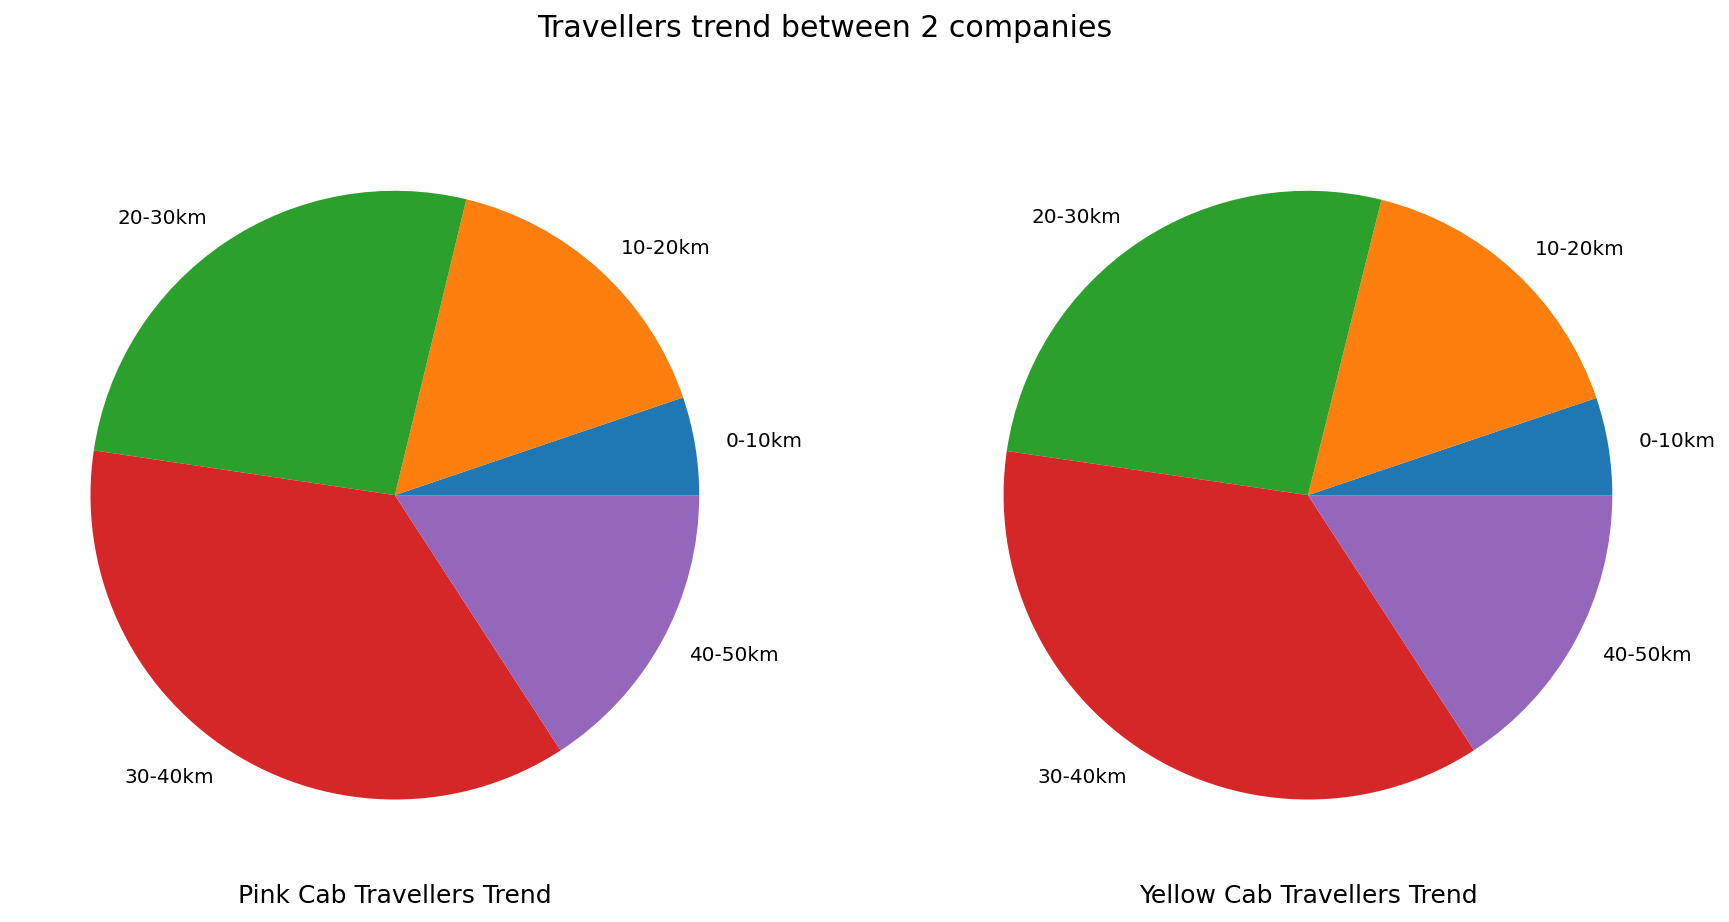

In [18]:
# Study the travellers trend

# Pink cab
pc_rang1 = pink_cab[(0 <= pink_cab["KM Travelled"]) & (pink_cab["KM Travelled"] < 10)]["KM Travelled"].sum()
pc_rang2 = pink_cab[(10 <= pink_cab["KM Travelled"]) & (pink_cab["KM Travelled"] < 20)]["KM Travelled"].sum()
pc_rang3 = pink_cab[(20 <= pink_cab["KM Travelled"]) & (pink_cab["KM Travelled"] < 30)]["KM Travelled"].sum()
pc_rang4 = pink_cab[(30 <= pink_cab["KM Travelled"]) & (pink_cab["KM Travelled"] < 40)]["KM Travelled"].sum()
pc_rang5 = pink_cab[(40 <= pink_cab["KM Travelled"]) & (pink_cab["KM Travelled"] < 50)]["KM Travelled"].sum()

# Yellow cab
yc_rang1 = yellow_cab[(0 <= yellow_cab["KM Travelled"]) & (yellow_cab["KM Travelled"] < 10)]["KM Travelled"].sum()
yc_rang2 = yellow_cab[(10 <= yellow_cab["KM Travelled"]) & (yellow_cab["KM Travelled"] < 20)]["KM Travelled"].sum()
yc_rang3 = yellow_cab[(20 <= yellow_cab["KM Travelled"]) & (yellow_cab["KM Travelled"] < 30)]["KM Travelled"].sum()
yc_rang4 = yellow_cab[(30 <= yellow_cab["KM Travelled"]) & (yellow_cab["KM Travelled"] < 40)]["KM Travelled"].sum()
yc_rang5 = yellow_cab[(40 <= yellow_cab["KM Travelled"]) & (yellow_cab["KM Travelled"] < 50)]["KM Travelled"].sum()

# Define the graph
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Travellers trend between 2 companies", fontsize = 15)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph

ax1.pie([pc_rang1, pc_rang2, pc_rang3, pc_rang4, pc_rang5], labels = ["0-10km", "10-20km", "20-30km", "30-40km", "40-50km"])
ax1.set_xlabel("Pink Cab Travellers Trend", fontsize = 12.5)

ax2.pie([yc_rang1, yc_rang2, yc_rang3, yc_rang4, yc_rang5], labels = ["0-10km", "10-20km", "20-30km", "30-40km", "40-50km"])
ax2.set_xlabel("Yellow Cab Travellers Trend", fontsize = 12.5)


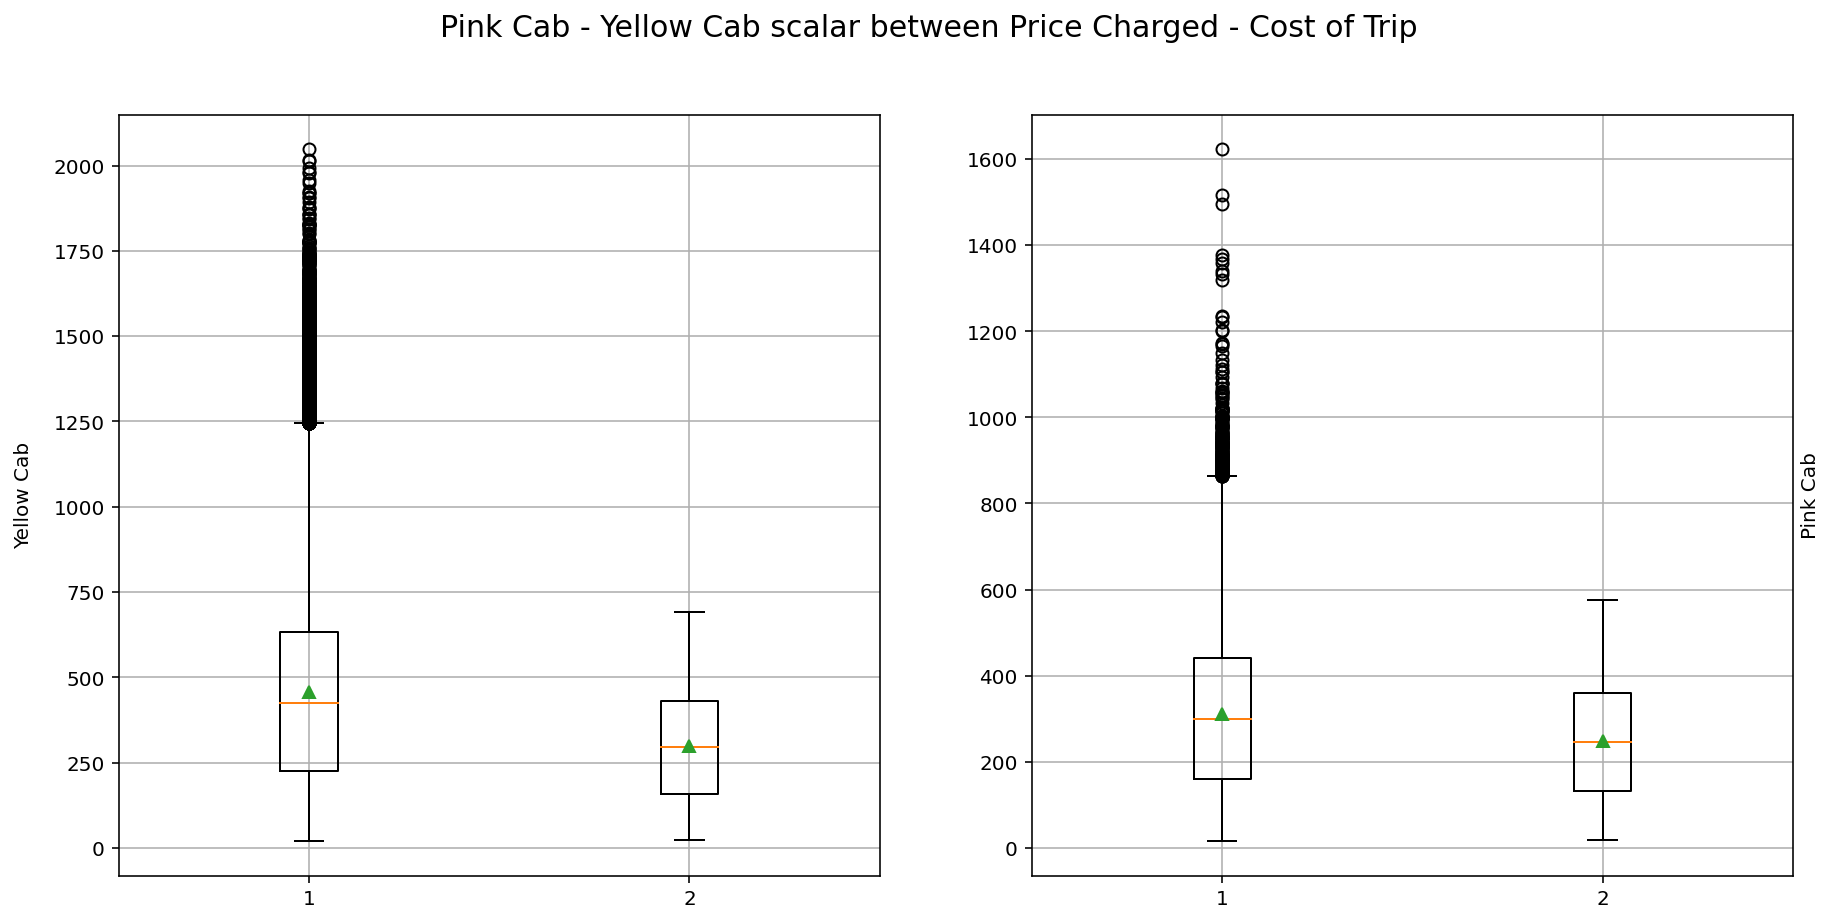

In [9]:
# Boxplot of 2 cab companies price charged - cost of trip
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle("Pink Cab - Yellow Cab scalar between Price Charged - Cost of Trip", fontsize = 15)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph

# ax1
ax1.boxplot([yellow_cab["Price Charged"], yellow_cab["Cost of Trip"]], showmeans = True)
ax1.set_ylabel("Yellow Cab", labelpad = 10)
ax1.grid()

# ax2
ax2.boxplot([pink_cab["Price Charged"], pink_cab["Cost of Trip"]], showmeans = True)
ax2.set_ylabel("Pink Cab", fontsize = 10)
ax2.yaxis.set_label_position("right")
ax2.grid()


In [14]:
res = 0
for i in scalar(yellow_cab) : 
    if i < 0 : 
        res += 1
len(yellow_cab)

274681

Text(0.5, 0, 'Yellow Cab')

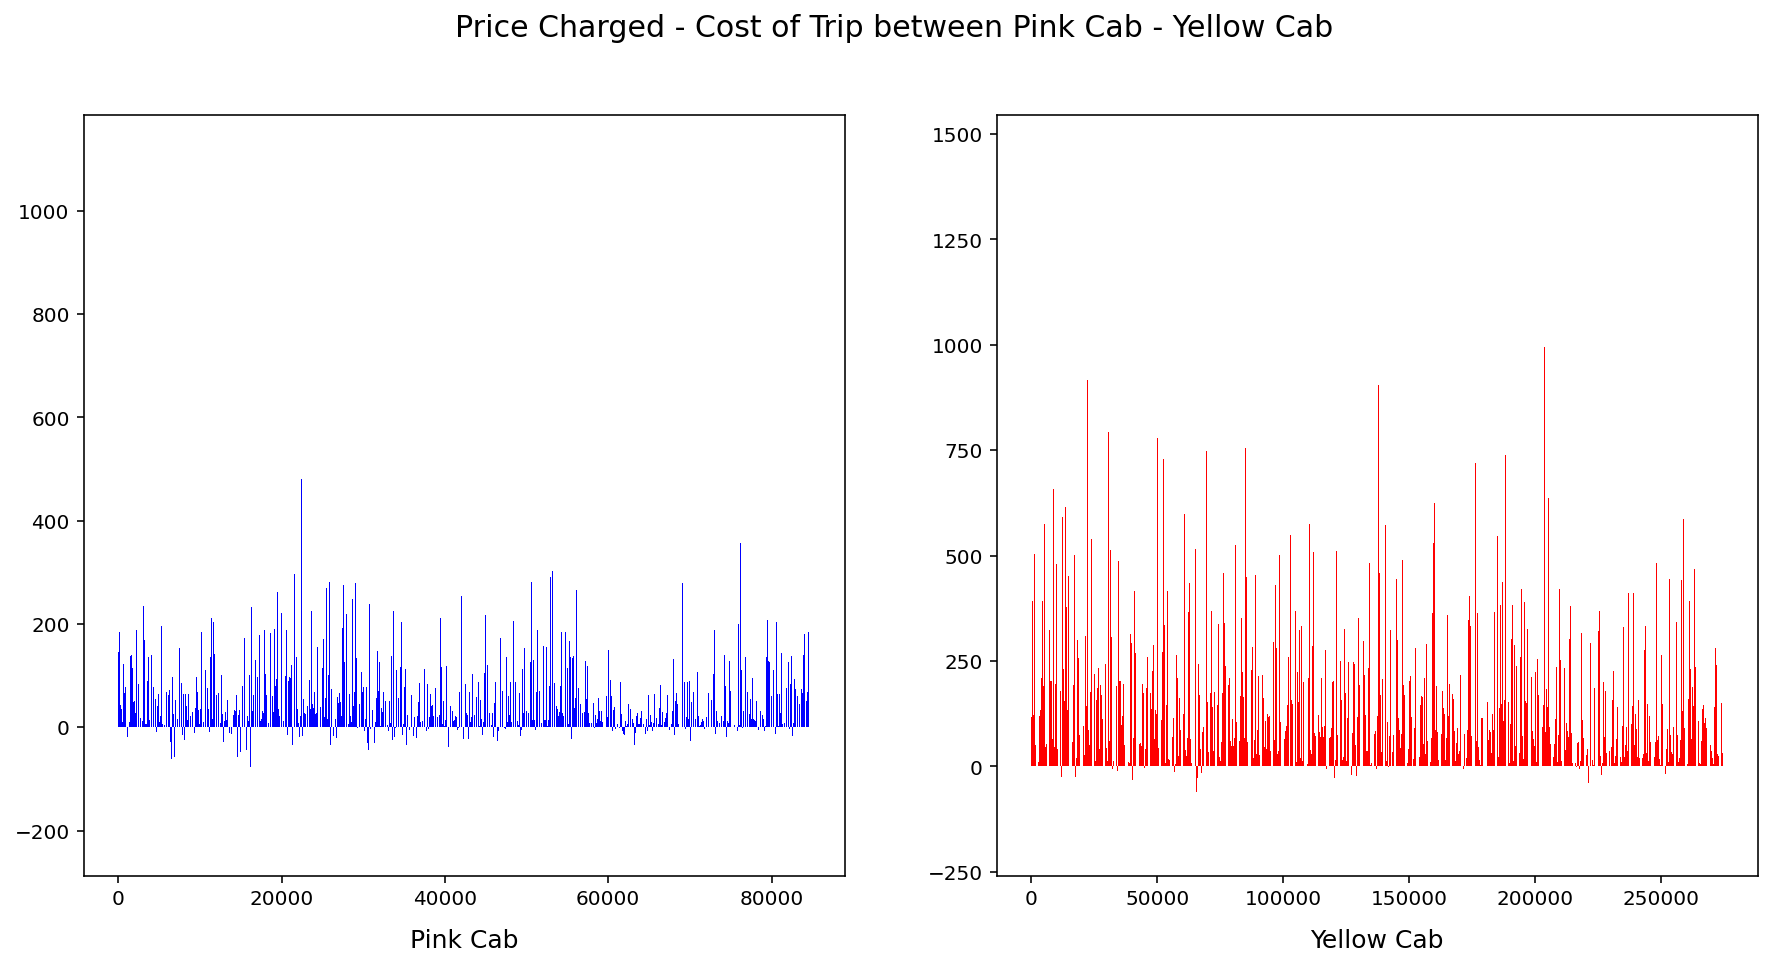

In [10]:
# Bar graph of scalar
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph
fig.suptitle("Price Charged - Cost of Trip between Pink Cab - Yellow Cab", fontsize = 15)

# bar 1
x1 = range(len(pink_cab))
ax1.bar(x1, scalar(pink_cab), color = "blue")
ax1.set_xlabel("Pink Cab", labelpad = 10, fontsize = 12.5)

# bar 2
x2 = range(len(yellow_cab))
ax2.bar(x2, scalar(yellow_cab), color = "red")
ax2.set_xlabel("Yellow Cab", labelpad = 10, fontsize = 12.5)

In [30]:
lr = []
for i in scalar(yellow_cab) : 
    if i > 0 : 
        lr.append(i)
(len(lr)/len(scalar(yellow_cab)))*100

95.0153086671448

In [9]:
lr = []
for i in scalar(pink_cab) : 
    if i < 0 : 
        lr.append(i)
len(lr)

11129

In [10]:
li = []
for j in scalar(yellow_cab) : 
    if j < 0 :
        li.append(j)
        
len(li)

13690

In [11]:
def organize(data) : 
    """
    Create a dictionnairy that tracks data
    """
    di = dict()
    for i in data["City"] : 
        if i in di : 
            di[i] += 1
        else : 
            di[i] = 1
    return di

Text(0.5, 0, 'Yellow Cab')

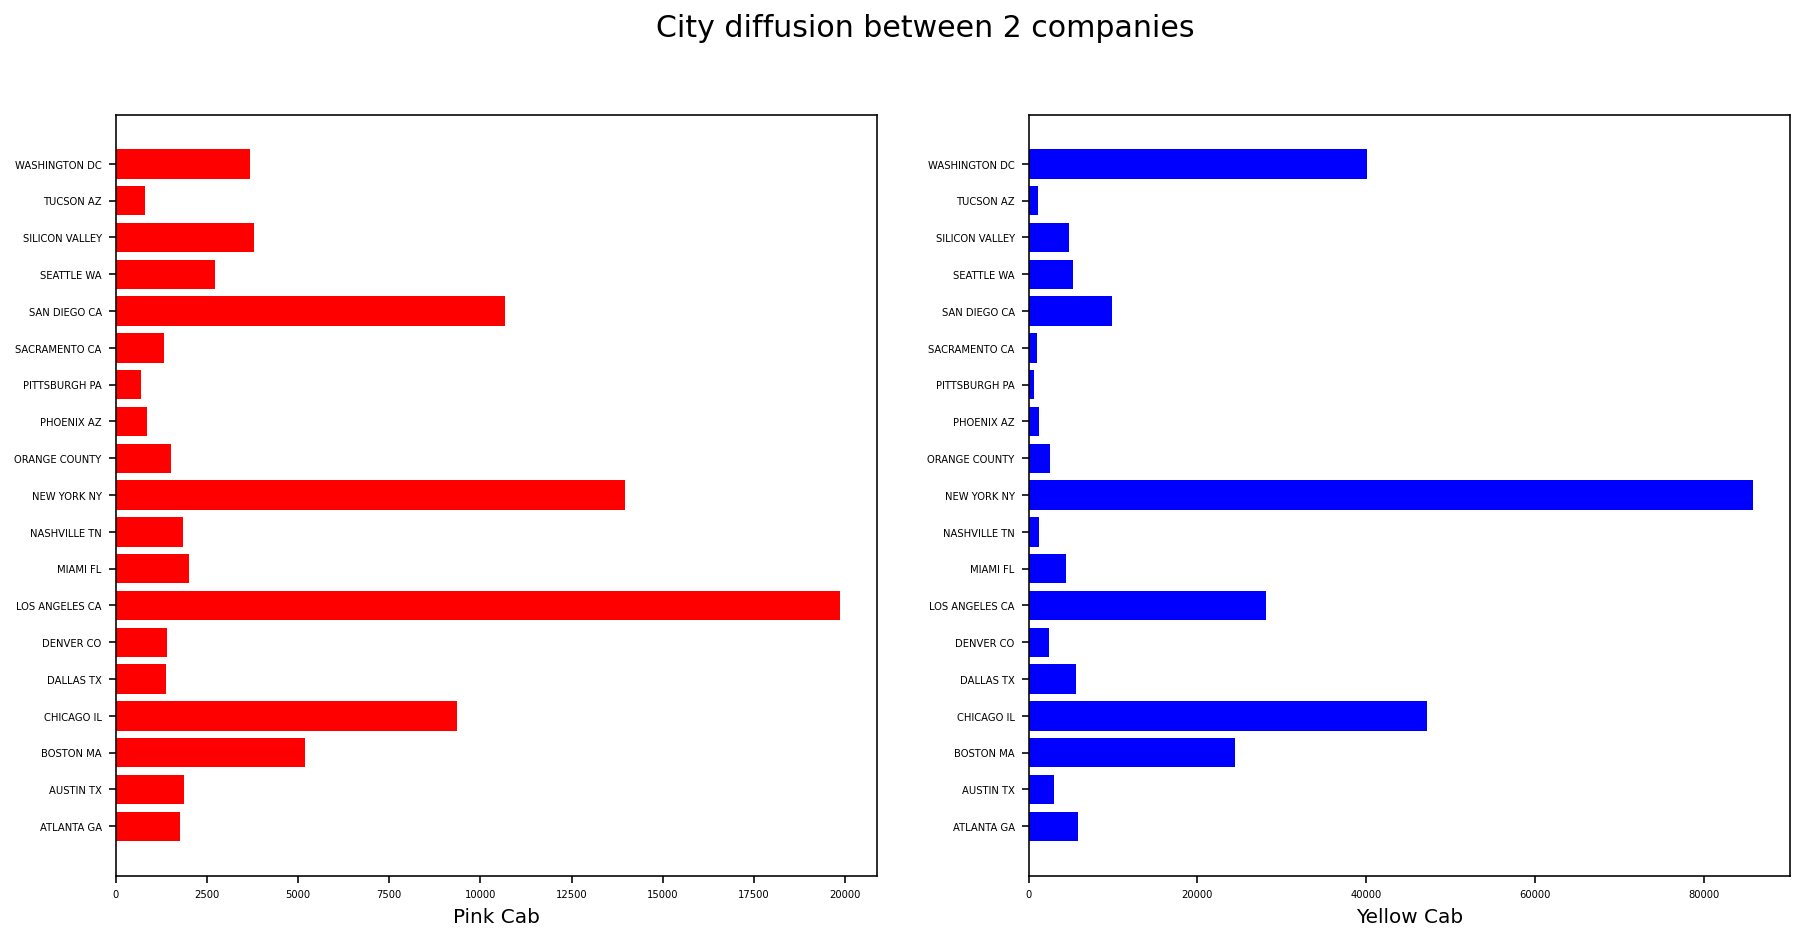

In [50]:
yc_di = organize(yellow_cab)
pc_di = organize(pink_cab)

yc_li = []
pc_li = []

yc_lr = []
pc_lr = []
for (k,v) in yc_di.items() :
    yc_li.append(k)
    yc_lr.append(v)
    
for (m,n) in pc_di.items() : 
    pc_li.append(m)
    pc_lr.append(n)
    
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph
fig.suptitle("City diffusion between 2 companies", fontsize = 15)

ax1.barh(range(len(pc_lr)), pc_lr, tick_label = pc_li, color = "red")
ax1.tick_params(labelsize = 5)
ax1.set_xlabel("Pink Cab")

ax2.barh(range(len(yc_lr)), yc_lr, tick_label = yc_li, color = "blue")
ax2.tick_params(labelsize = 5)
ax2.set_xlabel("Yellow Cab")

In [40]:
htmlConclusion = """ <!DOCTYPE html>
    <body>
        <h2> Conclusion </h2>
        <p>
As we can see, the number of Yellow Cab travelers is 4 times higher than Pink Cab travelers, especially in 4 main cities, which are Economical Central of the US : Washington DC, New York, Chicago IL and Los Angeles CA and another smaller is San Diego CA.        </p>
    </body>
"""
HTML(htmlConclusion)

### Extra informations

## City data

In [47]:
df_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


Text(0.5, 0, 'Population - Users Proportion')

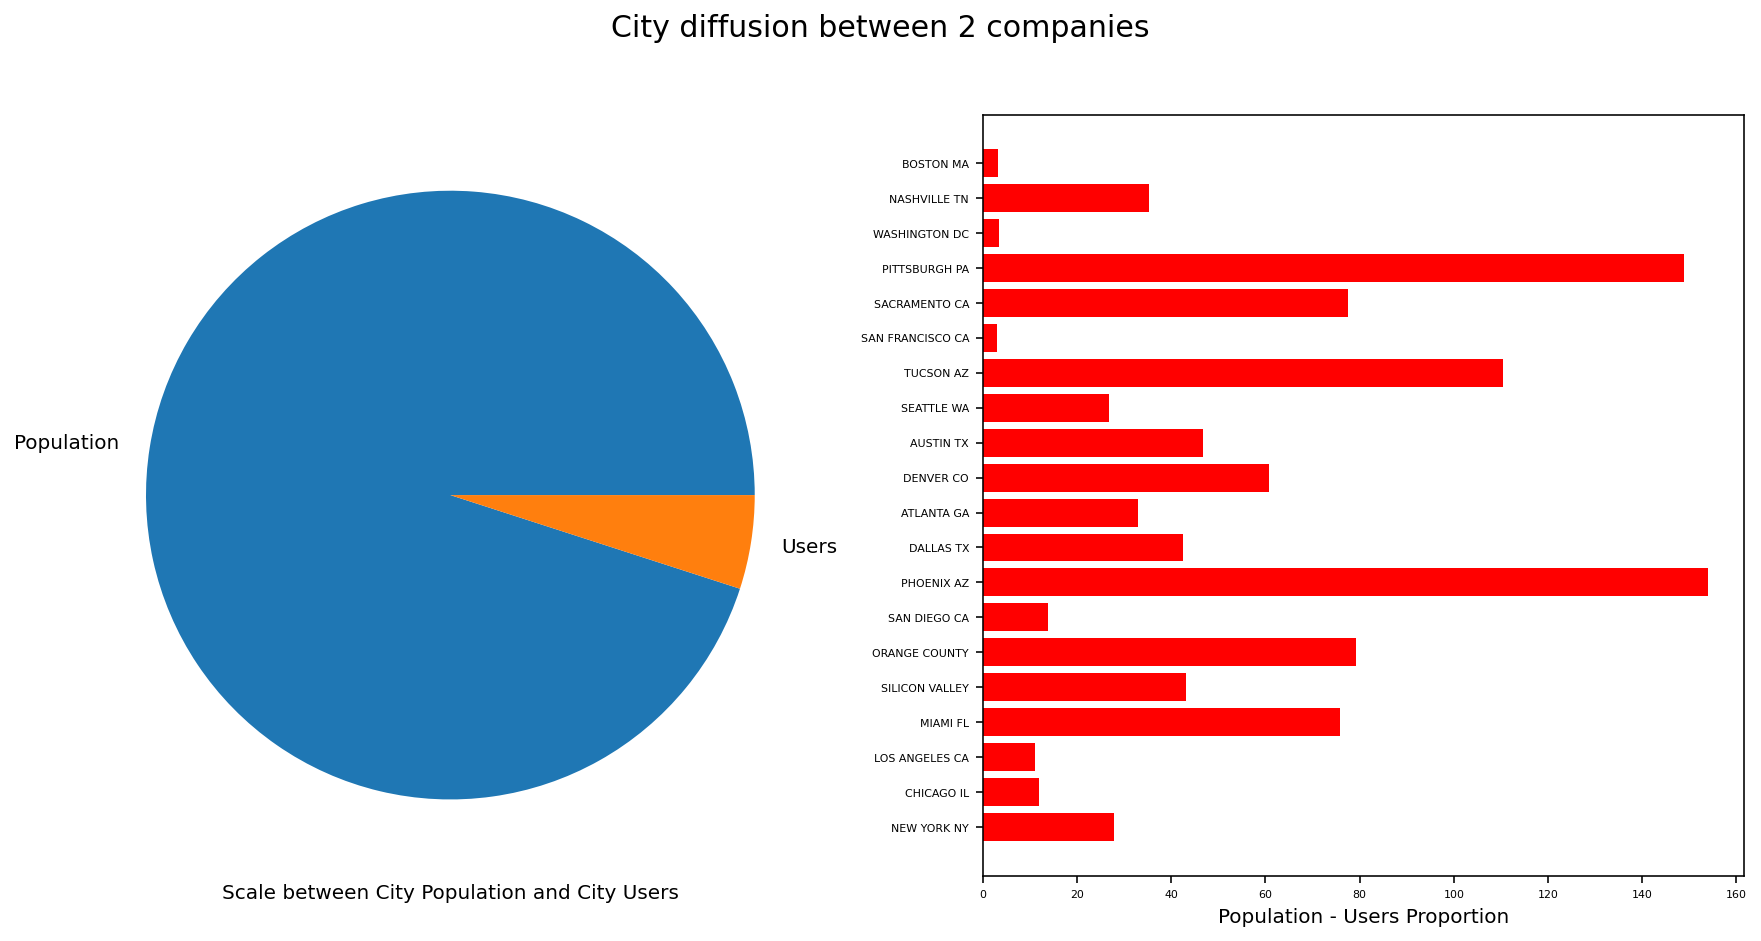

In [61]:
population = df_city["Population"].sum()
users = df_city["Users"].sum()

lr = []
for i in range(len(df_city)) : 
    lr.append(df_city["Population"][i] / df_city["Users"][i])

# Define 2 graphs
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph
fig.suptitle("City diffusion between 2 companies", fontsize = 15)

ax1.pie([population, users], labels = ["Population", "Users"])
ax1.set_xlabel("Scale between City Population and City Users")

ax2.barh(range(len(lr)), lr, tick_label = df_city["City"], color = "red")
ax2.tick_params(labelsize = 5.5)
ax2.set_xlabel("Population - Users Proportion")

## Customer

In [16]:
female = df_customer[df_customer["Gender"] == "Female"]
male = df_customer[df_customer["Gender"] == "Male"]
df_customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


Text(0.5, 0.98, 'Age range')

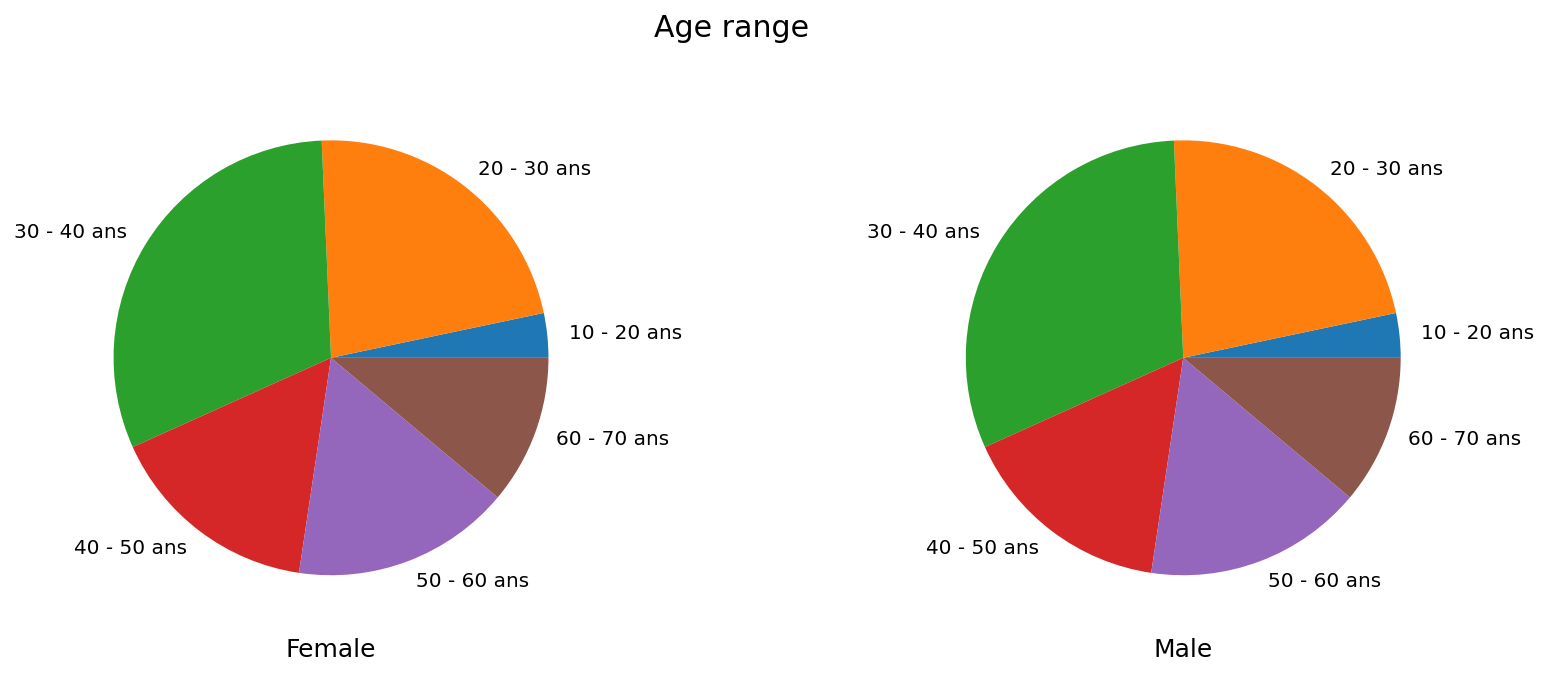

In [17]:
fe_rang1 = female[(10 <= female["Age"]) & (female["Age"] < 20)]["Age"].sum()
fe_rang2 = female[(20 <= female["Age"]) & (female["Age"] < 30)]["Age"].sum()
fe_rang3 = female[(30 <= female["Age"]) & (female["Age"] < 40)]["Age"].sum()
fe_rang4 = female[(40 <= female["Age"]) & (female["Age"] < 50)]["Age"].sum()
fe_rang5 = female[(50 <= female["Age"]) & (female["Age"] < 60)]["Age"].sum()
fe_rang6 = female[(60 <= female["Age"]) & (female["Age"] < 70)]["Age"].sum()

ma_rang1 = male[(10 <= male["Age"]) & (male["Age"] < 20)]["Age"].sum()
ma_rang2 = male[(20 <= male["Age"]) & (male["Age"] < 30)]["Age"].sum()
ma_rang3 = male[(30 <= male["Age"]) & (male["Age"] < 40)]["Age"].sum()
ma_rang4 = male[(40 <= male["Age"]) & (male["Age"] < 50)]["Age"].sum()
ma_rang5 = male[(50 <= male["Age"]) & (male["Age"] < 60)]["Age"].sum()
ma_rang6 = male[(60 <= male["Age"]) & (male["Age"] < 70)]["Age"].sum()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 5, forward = True) # modify the size of the graph

ax1.pie([fe_rang1, fe_rang2, fe_rang3, fe_rang4, fe_rang5, fe_rang6], labels = ["10 - 20 ans","20 - 30 ans","30 - 40 ans","40 - 50 ans","50 - 60 ans","60 - 70 ans"])
ax1.set_xlabel("Female", fontsize = 12.5)
ax2.pie([fe_rang1, fe_rang2, fe_rang3, fe_rang4, fe_rang5, fe_rang6], labels = ["10 - 20 ans","20 - 30 ans","30 - 40 ans","40 - 50 ans","50 - 60 ans","60 - 70 ans"])
ax2.set_xlabel("Male", fontsize = 12.5)

fig.suptitle("Age range", fontsize = 15)

In [58]:
df_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


Text(0.5, 1.0, 'Payment Mode Range')

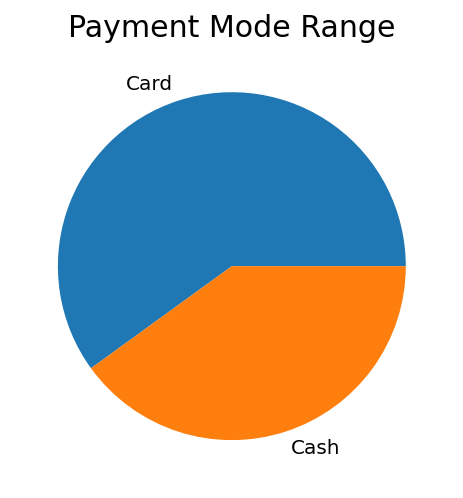

In [66]:
card = len(df_ID[df_ID["Payment_Mode"] == "Card"]["Payment_Mode"])
cash = len(df_ID[df_ID["Payment_Mode"] == "Cash"]["Payment_Mode"])

plt.pie([card, cash], labels = ["Card", "Cash"])
plt.title("Payment Mode Range", fontsize = 15)